In [1]:
from deeppavlov.core.common.file import read_json
from deeppavlov import build_model, configs
import pandas as pd
import sys
import random
import numpy as np

# Load data

### Onco data

In [2]:
df = pd.read_csv('datasets/cleared_RUS.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,PROTOCOL,ZAKL,CARD_NUMB,FULL_TEXT,CLEARED
0,0,0,Легочной рисунок сгущен с обеих сторон в базал...,Для исключения подтверждения плеврита и опреде...,19/015013,Легочной рисунок сгущен с обеих сторон в базал...,Легочной рисунок сгущен с обеих сторон в базал...
1,1,1,Слева в проекции 1-го межреберья тень округлой...,Ro-ки картина периф тумора в доли левого лёгко...,11/001161,Слева в проекции 1-го межреберья тень округлой...,Слева в проекции 1-го межреберья тень округлой...
2,2,2,Легочной рисунок без очаговых и инфильтративны...,Данных за онкопатологию в легочной ткани не вы...,19/080831,Легочной рисунок без очаговых и инфильтративны...,Легочной рисунок без очаговых и инфильтративны...
3,3,3,На Ро грам и То грам ОГК Легочной рисунок усил...,Периф тумор нижней доли левого легкого По срав...,20/000962,На Ро грам и То грам ОГК Легочной рисунок усил...,На Ро грам и То грам ОГК Легочной рисунок усил...
4,4,4,Легочной рисунок усилен с обеих сторон с участ...,Данных за онкопатологию в легочной ткани не вы...,19/055026,Легочной рисунок усилен с обеих сторон с участ...,Легочной рисунок усилен с обеих сторон с участ...


In [3]:
text = df.CLEARED.to_list()
len(text)

8353

### TB Data

In [15]:
import re
from utils.text_preprocessing import tokenize, stopwords, clean_text, preprocess
from parsers.russian_parser import Russian

[nltk_data] Downloading package punkt to /home/genvekt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/genvekt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/genvekt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/genvekt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
rus_data = Russian()
rus_data.parse_data()
len(rus_data.dataset)
rus_data = clean_text(rus_data)
text = []
for report in rus_data.dataset:
    if report.label != 'норма':
        text.append(report.text)
len(text)

No diagnosis in  74319
No diagnosis in  74308


2338

In [17]:
text

['во втором межреберье справа фокусная тень',
 'справа в c1 инфильтрация легочной ткани.рекомендация:консультация. фтизиатра.',
 'в головке правого корня в s2 участок инфильтрации',
 'участок затенения в xxx- с3 справа',
 'участок затенения над дугой справа(пневмония)',
 'справа в c2 инфильтрация  легочной ткани. рекомендация: консультация. фтизиатра ркпд.',
 'очаг тени слив характера в с1-с2 с обеих сторон.',
 'справа головка корня расширена,инфильтративна.(пневмония?)',
 'подозрениние на очаг тени в с2 слева',
 'мягкая очаговая тень во втором межреберье слева',
 'слева затенение бронхопневмония/кардинально,очаг тени в зоне с1-2 на фоне усиление сосуд рисунка',
 'очаговая тень в первом межреберье справа.',
 'слева в с1-2 фиброз и плотный очаг тени',
 'справа очаг тени в с1,фокусная тень во втором межреберье.',
 'инфильтрация в проекции c5 слева.',
 'инфильтрация верхних долей обоих легких с признаками распада.',
 'справа в с1.2 инфильтрация легочной ткани с распадом. консультация. фти

## Short data to fit model

In [20]:
import re
text_shorted = []
for i in range(len(text)):
    report = re.sub(r'(?u)(\d+)', ' ',text[i])
    report = re.sub(r'(?u)(-)', ' ',report)
    report = re.sub(r'(?u)(\s+)', ' ',report)
    words = report.split(' ')
    max_tokens = 300
    if len(words)> max_tokens:
        print(i)
        words = words[: max_tokens]
    text_shorted.append(' '.join(words))

In [21]:
text_shorted

['во втором межреберье справа фокусная тень',
 'справа в c1 инфильтрация легочной ткани.рекомендация:консультация. фтизиатра.',
 'в головке правого корня в s2 участок инфильтрации',
 'участок затенения в xxx- с3 справа',
 'участок затенения над дугой справа(пневмония)',
 'справа в c2 инфильтрация  легочной ткани. рекомендация: консультация. фтизиатра ркпд.',
 'очаг тени слив характера в с1-с2 с обеих сторон.',
 'справа головка корня расширена,инфильтративна.(пневмония?)',
 'подозрениние на очаг тени в с2 слева',
 'мягкая очаговая тень во втором межреберье слева',
 'слева затенение бронхопневмония/кардинально,очаг тени в зоне с1-2 на фоне усиление сосуд рисунка',
 'очаговая тень в первом межреберье справа.',
 'слева в с1-2 фиброз и плотный очаг тени',
 'справа очаг тени в с1,фокусная тень во втором межреберье.',
 'инфильтрация в проекции c5 слева.',
 'инфильтрация верхних долей обоих легких с признаками распада.',
 'справа в с1.2 инфильтрация легочной ткани с распадом. консультация. фти

# Create Bert Model

In [7]:
bert_config = read_json(configs.embedder.bert_embedder)
bert_config['metadata']['variables']['BERT_PATH'] = 'models/rubert_cased_L-12_H-768_A-12_pt/'
bert_model = build_model(bert_config)

[nltk_data] Downloading package punkt to /home/genvekt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/genvekt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/genvekt/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/genvekt/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


# Get word Embedings

In [22]:
vectors = []
batch = 20
for i in range(len(text_shorted)//batch):
    print(i*batch, (i+1)*batch)
    tokens, token_embs, subtokens, subtoken_embs, sent_max_embs, sent_mean_embs, bert_pooler_outputs = bert_model(text_shorted[i*batch: (i+1)*batch])
    vectors.extend(sent_mean_embs)
                        

0 20
20 40
40 60
60 80
80 100
100 120
120 140
140 160
160 180
180 200
200 220
220 240
240 260
260 280
280 300
300 320
320 340
340 360
360 380
380 400
400 420
420 440
440 460
460 480
480 500
500 520
520 540
540 560
560 580
580 600
600 620
620 640
640 660
660 680
680 700
700 720
720 740
740 760
760 780
780 800
800 820
820 840
840 860
860 880
880 900
900 920
920 940
940 960
960 980
980 1000
1000 1020
1020 1040
1040 1060
1060 1080
1080 1100
1100 1120
1120 1140
1140 1160
1160 1180
1180 1200
1200 1220
1220 1240
1240 1260
1260 1280
1280 1300
1300 1320
1320 1340
1340 1360
1360 1380
1380 1400
1400 1420
1420 1440
1440 1460
1460 1480
1480 1500
1500 1520
1520 1540
1540 1560
1560 1580
1580 1600
1600 1620
1620 1640
1640 1660
1660 1680
1680 1700
1700 1720
1720 1740
1740 1760
1760 1780
1780 1800
1800 1820
1820 1840
1840 1860
1860 1880
1880 1900
1900 1920
1920 1940
1940 1960
1960 1980
1980 2000
2000 2020
2020 2040
2040 2060
2060 2080
2080 2100
2100 2120
2120 2140
2140 2160
2160 2180
2180 2200
2200 2220

In [23]:
len(vectors)

2320

## t-SNE

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [24]:
X = np.array(vectors)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(2320, 2)

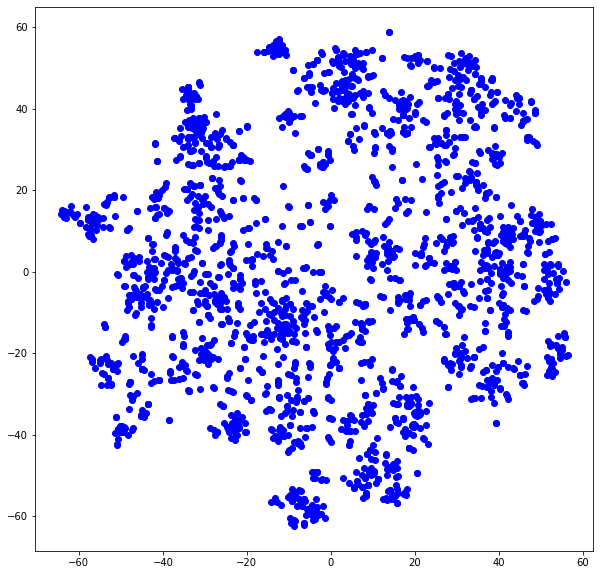

In [25]:
plt.figure(figsize=(10,10))
for i in range(len(X_embedded)):
    point = X_embedded[i]
    '''
    if 'без' in text[i] and 'изменений' in text[i]:
        color = 'green'
    else:
        color = 'blue'
    '''
    color = 'blue'
    plt.plot(point[0],point[1], 'o', color=color)
plt.plot()
plt.savefig('plots/BERT_TB.png')

## Get samples

In [14]:
def get_samples_around(center_point,  w_radius, h_radius):
    for i in range(len(X_embedded)):
        if abs(X_embedded[i][0] - center_point[0]) < w_radius and abs(X_embedded[i][1] - center_point[1])<h_radius:
            print(text[i])
            print()

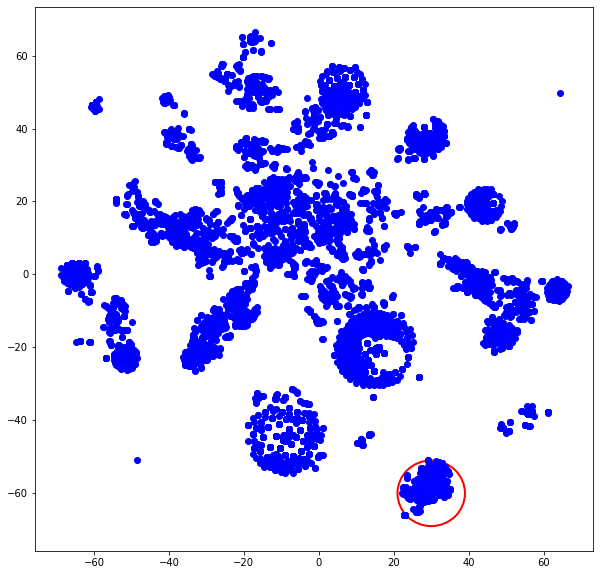

In [15]:
from matplotlib.patches import Ellipse
    
center = (30, -60)
area_w = 9
area_h = 9

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [16]:
get_samples_around(center, area_w , area_h)

Легкие пневмосклероз легочной рисунок усилен обогащен за счет сосудистых элементов по сетчатому типу поля без видимых очаговый и инфильтративных изменений Корни структурные уплотнены за счет сосудистого и фиброзного компонентов тяжесть Справа передний кардио-диафрагмальный синус облитерирован плевро-пери кардио-диафрагмальные спайки М долевая плевра справа уплотнена Средостение не расширено Медиастинальная плевра умеренно натянута уплотнена в верхнем и ср этаже с обеих сторон Cor аорта - возрастные изменения Аорта уплотнена умеренно удлинена S-образно извитая дуга ее частично обызвествленная Правосторонний кифосколиоз ГОП изменения дегенеративно-дистрофического характера Ro -ки ребра ключицы лопатки грудина б о Хрящевые отрезки ребер частично обызвествленный  Легкие сердце аорта - возрастные изменения сн - 2 DIS 

Легкие диффузный пневмофиброз легочной рисунок усилен обогащен за счет сосудистых элементов по сетчатому типу поля без видимых очаговых и инфильтративных изменений Корни стру

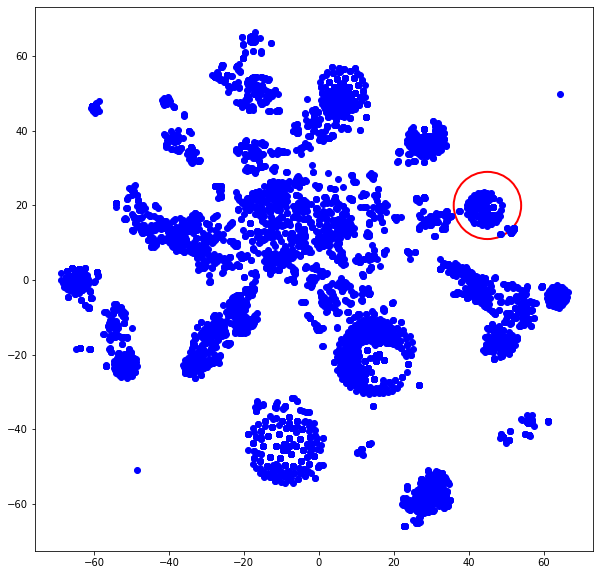

In [18]:
from matplotlib.patches import Ellipse
    
center = (45, 20)
area_w = 9
area_h = 9

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [19]:
get_samples_around(center, area_w , area_h)

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастных изменений Косной патологии на уровне исследования не просматривается  

Легкие сердце аорта в пределах возрастных изменений Очаговой патологии в легочной ткани не просматривается  

Легкие сердце аорта в пределах возрастной нормы  

см кон снимков  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

см конс. снимков  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пределах возрастной нормы  

Легкие сердце аорта в пр

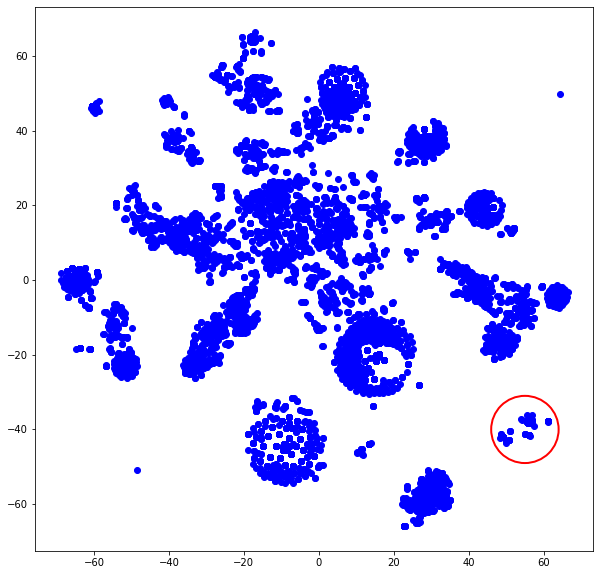

In [32]:
from matplotlib.patches import Ellipse
    
center = (55,-40)
area_w = 9
area_h = 9

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [33]:
get_samples_around(center, area_w , area_h)

На рентгенограмме ОГК от 17 01 2020 Легочные поля прозрачны Легочной рисунок не усилен не деформирован Корни легких структурные не уплотнены Тень средостения по центру Диафрагма на уровне 6-ого ребра с обеих сторон Синусы свободны Костный остов без изменений Заключение Данных за онкопатологию в легочной ткани не выявлено  

На рентгенограмме ОГК от 15 01 2020 Легочные поля прозрачны Легочной рисунок не усилен не деформирован Корни легких структурные не уплотнены Тень средостения по центру Диафрагма на уровне 6-ого ребра с обеих сторон Синусы свободны Костный остов без изменений Заключение Данных за онкопатологию в легочной ткани не выявлено  

На рентгенограмме ОГК от 15 10 2020г Легочные поля прозрачны Легочной рисунок не усилен не деформирован Корни легких структурные не уплотнены Тень средостения по центру Диафрагма на уровне 6-ого ребра с обеих сторон Синусы свободны Костный остов без изменений Заключение Данных за онкопатологию в легочной ткани не выявлено  

На рентгенограмме ОГК

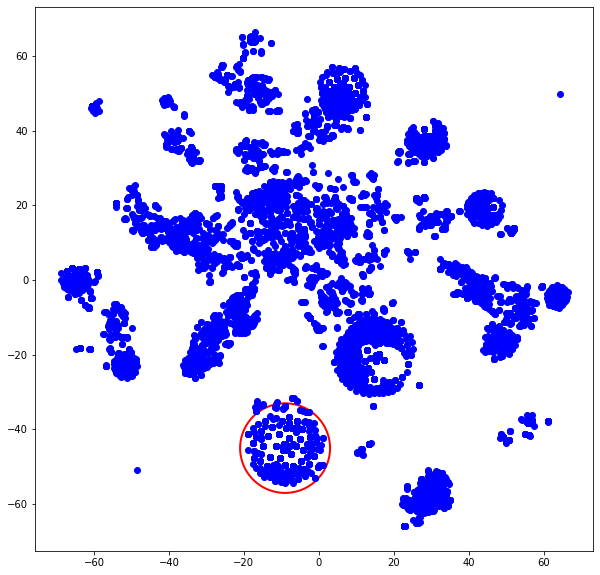

In [34]:
from matplotlib.patches import Ellipse
    
center = (-9,-45)
area_w = 12
area_h = 12

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [35]:
get_samples_around(center, area_w , area_h)

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы  

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы  

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы  

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы  

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы  

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы  

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные С

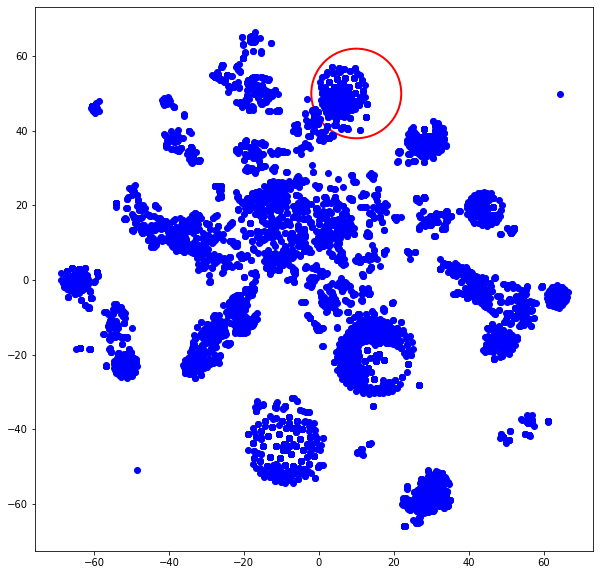

In [36]:
from matplotlib.patches import Ellipse
    
center = (10,50)
area_w = 12
area_h = 12

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [37]:
get_samples_around(center, area_w , area_h)

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Дистрофические изменения в ГОП  Данных за онкопатологию в легочной ткани не выявлено

Легочной рисунок без очаговых и инфильтративных изменений Справа дистальный конец порта Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Дистрофические изменения в ГОП  Данных за онкопатологию в легочной ткани не выявлено

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Дистрофические изменения в ГОП  Данных за онкопатологию в легочной ткани не выявлено

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Оба купола приприподнязы за счет раздутых петель толстого к-ка и желудка Средостение не расширено Сердце аорта в пределах нормы Дистрофические изменения в ГОП  Данных за патол

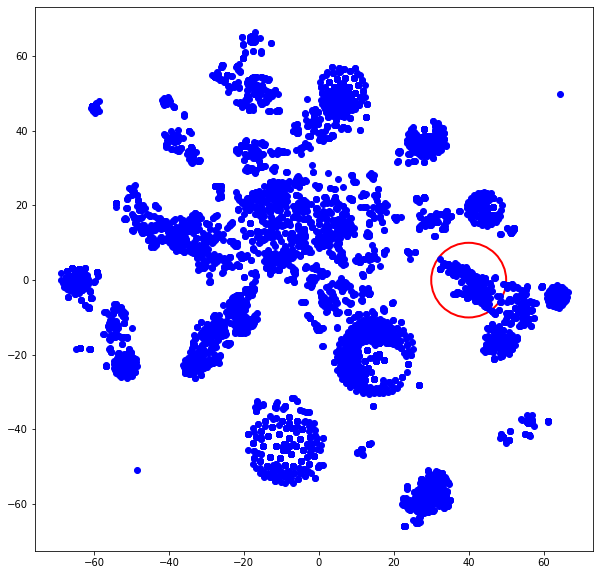

In [39]:
from matplotlib.patches import Ellipse
    
center = (40,0)
area_w = 10
area_h = 10

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [40]:
get_samples_around(center, area_w , area_h)

Лёгкие расправлены В базальных отделах с обеих сторон тяжести-очаговый пневмофиброз справа утолщена м долевая плевра Корни фиброзно уплотнены Сердце аорта - в пределах N Верхнее средостение несколько расширено за счёт сосудистых структур жировой клетчатки сн 2 

Лёгкие расправлены синусы свободные Справа - в зоне операции пульмонит пристеночные плевральные наложения Сердце аорта - в пределах N сн - 2 

Лёгкие расправлены синусы свободные Справа - в зоне операции пульмонит пристеночно - плевральные наложения Сердце аорта - в пределах N От 14 01 2020г - без существенной динамики сн - 2 

Лёгкие справа - в базально-медиальных отделах тень дисковидного ателектаза синусы свободные Слева - лёгкое расправлено прозрачность легочного поля снижена из-за плащевидных пристеночных плевральных наложений синусы свободные купол диафрагмы подтянут вверх Сердце аорта - в пределах N Средостение не расширено сн - 2 

Справа - лёгкое расправлено в зоне операции пульмонит купол диафрагмы подтянут вверх Слев

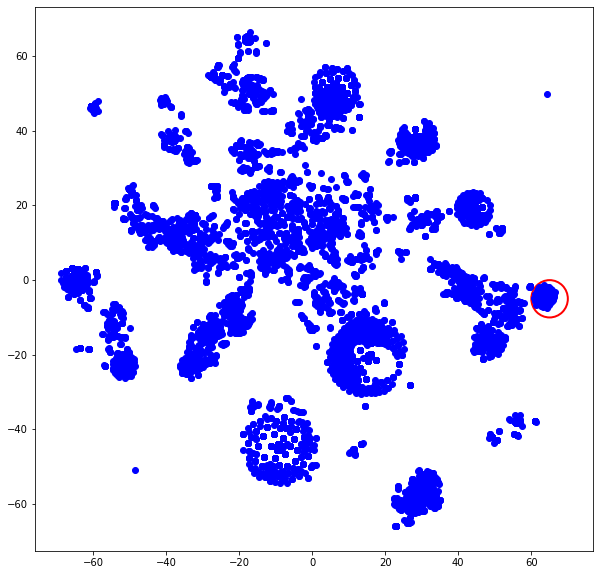

In [41]:
from matplotlib.patches import Ellipse
    
center = (65,-5)
area_w = 5
area_h = 5

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [42]:
get_samples_around(center, area_w , area_h)

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Костной патологии не определяется сн - 2 

Легочной рисунок без очаговых и инфильтративных изменений Справа в н доле тяжистый пневмофиброз Корни структурные Синусы свободные Средостение без явного расширения Предыдущие снимки для динамики не представлены Сердце аорта в пределах нормы Костной патологии не определяется сн - 2 

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Костной патологии не определяется сн - 2 

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Костной патологии не определяется сн - 2 

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах 

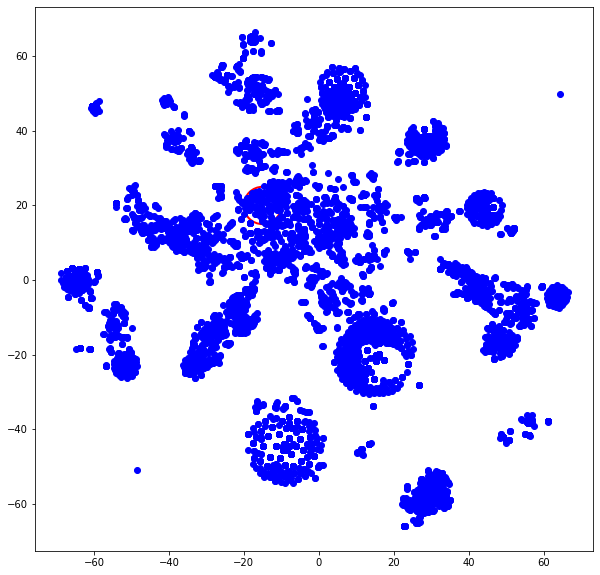

In [44]:
from matplotlib.patches import Ellipse
    
center = (-15,20)
area_w = 5
area_h = 5

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [45]:
get_samples_around(center, area_w , area_h)

Слева в проекции 1-го межреберья тень округлой формы с нечёткими неровными контурами размером 2 3 см в d Корни с не совсем чёткой структурой Синусы с обеих сторон завуалированы вероятно за счёт выпота плевральных наложений Трахея главные бронхи несколько смещены вправо Сердце аорта в пределах возрастной нормы Костной патологии не определяется  Ro-ки картина перов тумора в доли левого лёгкого Susp двусторонний плеврит сн-2 РЦ-2 

На Ро грам и То грам ОГК Легочной рисунок усилен с обеих сторон Слева в С 8 неоднородное затемнение 4 5х3 7 см с неровными нечеткими местами лучистыми контурами Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Дистрофические изменения в ГОП  Пери тумор нижней доли левого легкого По сравнению с 13 01 2020г без динамики

Легочной рисунок усилен с обеих сторон больше справа в верхнем отделе В верхней доле правого легкого определяется небольшой участок гиповентиляции с участками линейного ателектаза В нижнемедиальных отделах

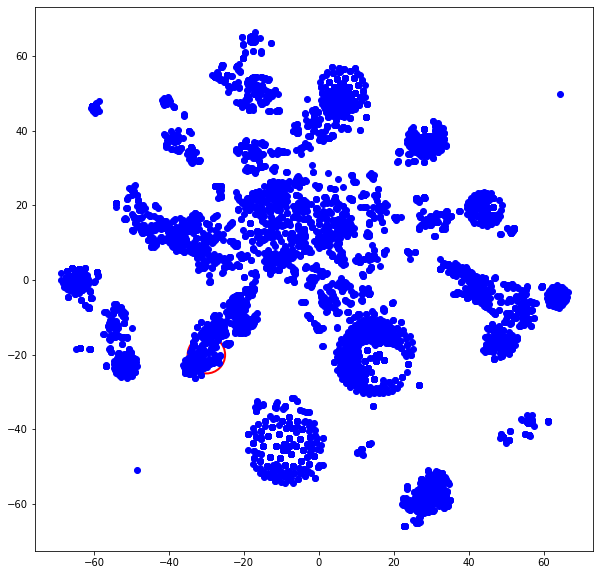

In [46]:
from matplotlib.patches import Ellipse
    
center = (-30,-20)
area_w = 5
area_h = 5

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [47]:
get_samples_around(center, area_w , area_h)

Легкие пневмосклероз легочной рисунок усилен диффузно обогащен за счет сосудистых элементов по сетчатому типу на сн6имках и при полипозиционном Ro -историческом исследовании слева в в поле на уровне 3-го м ребер по в контуру переднего отрезка 4-го ребра в проекции Saxill субплевральной прослеживается локальный асимметричный участок уплотнения округлой формы средней интенсивности с относительно ровными не совсем четкими размытыми контурами размерами до 0 5 см в d больше вероятно характера очагового пост воспалительного фиброза Корни структурные уплотнены за счет сосудистого и фиброзного компонентов тяжистые Синусы свободные Справа над диафрагмой в проекции кардио-диафрагмального синуса небольшие пристеночные плевральные наложения плевро-перикардиальные спайки Средостение не расширено Медиастинальная плевра справа умеренно натянута в ср этаже Cor аорта - возрастные изменения Аорта уплотнена дуга ее частично обызвествленная Правосторонний сколиоз ГОП изменения дегенеративно-дистрофическог

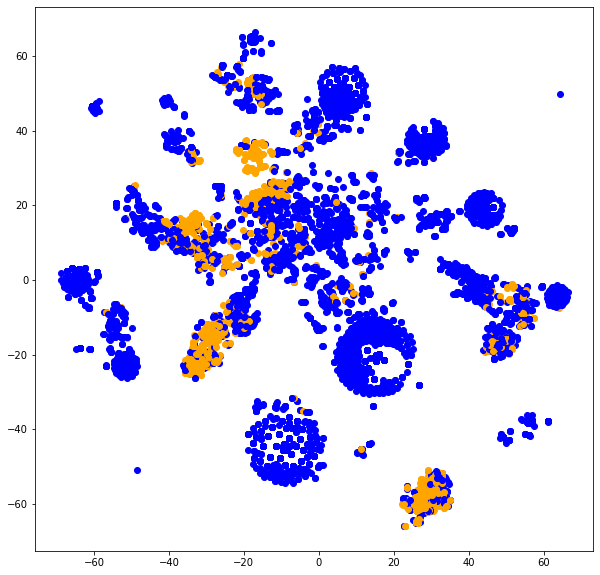

In [52]:
plt.figure(figsize=(10,10))
for i in range(len(X_embedded)):
    point = X_embedded[i]
    
    if 'пневмофиброз' in text[i]:
        color = 'orange'
    else:
        color = 'blue'
    
    
    plt.plot(point[0],point[1], 'o', color=color)
plt.plot()
plt.show()

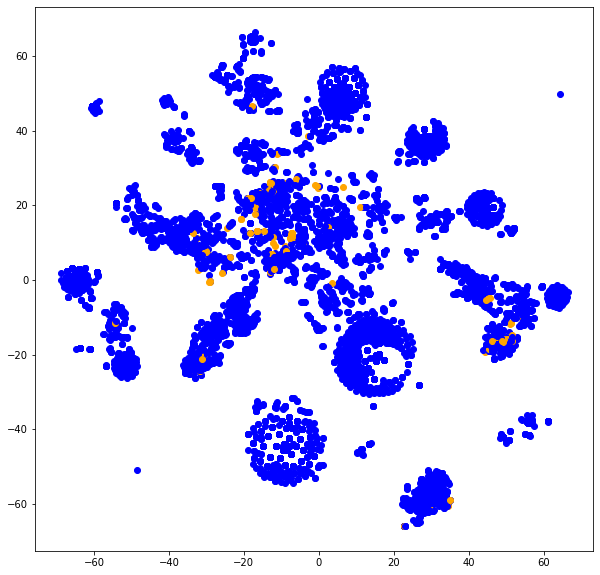

In [53]:
plt.figure(figsize=(10,10))
for i in range(len(X_embedded)):
    point = X_embedded[i]
    
    if 'пневмон' in text[i]:
        color = 'orange'
    else:
        color = 'blue'
    
    
    plt.plot(point[0],point[1], 'o', color=color)
plt.plot()
plt.show()

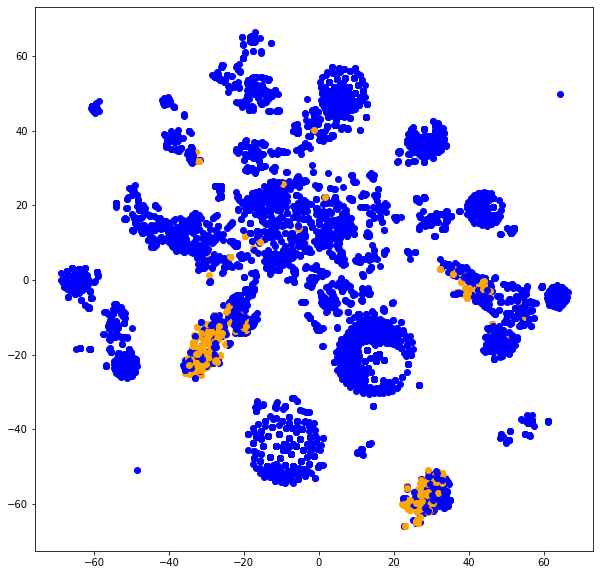

In [55]:
plt.figure(figsize=(10,10))
for i in range(len(X_embedded)):
    point = X_embedded[i]
    
    if 'эмфизема' in text[i]:
        color = 'orange'
    else:
        color = 'blue'
    
    
    plt.plot(point[0],point[1], 'o', color=color)
plt.plot()
plt.show()

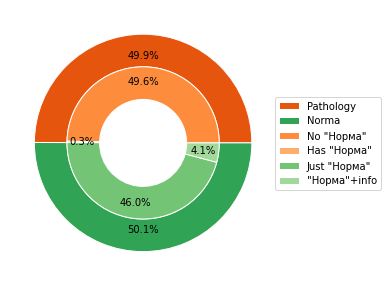

In [76]:
fig, ax = plt.subplots(figsize=(10,5))

size = 0.3
vals = np.array([[2324, 14], [2152, 192]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)[1:]
inner_colors = cmap(np.array([5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, autopct='%1.1f%%',pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, autopct='%1.1f%%',pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
ax.legend(['Pathology', 'Norma', 'No "Норма"', 'Has "Норма"', 'Just "Норма"', '"Норма"+info'],bbox_to_anchor=(0.85,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.plot()
plt.savefig('plots/TB_pie')

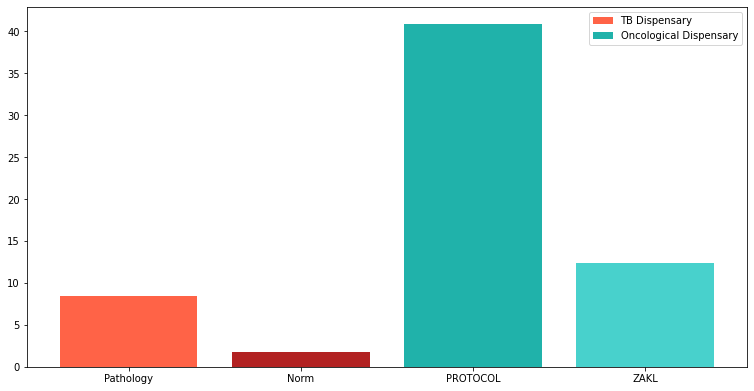

In [127]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
bars =  ('Pathology', 'Norm', 'PROTOCOL','ZAKL')
y_pos = np.arange(len(bars))
students = [8.43,1.8,40.89, 12.35]
ax.bar(bars[:2],students[:2],color=['tomato', 'firebrick', 'orange'])
ax.bar(bars[2:],students[2:],color=['lightseagreen','mediumturquoise'])

ax.legend(['TB Dispensary', 'Oncological Dispensary'])
plt.plot()
plt.savefig('plots/Bar.png')